In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
import pylab as pl
from IPython import display

In [2]:

def min_space(l):
    return sum(l) + len(l) -1

def list_rc(info, res_len):
    info_len = len(info)
    if info_len == 1:
        ones_len= info[0]
        base = [1] * ones_len
        return [ [0] * (res_len-ones_len-i) + base + [0] * i for i in range(res_len - ones_len +1)] 
    else:
        res = [[]]
        ones_len= info[0]
        base = [1] * ones_len
        res_space = min_space(info[1:])
        n_spaces = res_len - res_space - ones_len - 1   
        #print(n_spaces)
        for i in range(n_spaces+1):
            first = [0] * i + [1] * info[0] + [0]
            #print("call" + str( info[1:]) +str(res_space + n_spaces - i) )
            second =  list_rc(info[1:], res_space + n_spaces - i)
            res += [first + s  for s in second]
        #print(res[1:])
        return res[1:]
        
    

In [4]:
l = list_rc([1,3,5], 13)
l == [[1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
 [1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0],
 [1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
 [1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
 [1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
 [1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1],
 [0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
 [0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
 [0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1],
 [0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]]

True

In [6]:
No_clue = 2

def find_elt(l_poss):
    temp = [1] * len(l_poss[0])
    for l in l_poss:
        temp = [a&b for a, b in zip(l, temp)]
    return  [No_clue if t==0 else 1 for t in temp]

def find_zero(l_poss):
    temp = [1] * len(l_poss[0])
    for l in l_poss:
        temp = [a|b for a, b in zip(l, temp)]
    return [No_clue if t==1 else 0 for t in temp]

def find_mandatory(l_poss):
    if len(l_poss) > 0:
        temp = l_poss[0]
    else:
        print("Aie" + str(l_poss))
        raise
    for l in l_poss[1:]:
        temp = [2 if a != b else a for a, b in zip(l, temp)]
    return temp

def verif_poss(l_initial, l):
    for elt_initial, elt in zip(l_initial, l):
       
        if elt_initial == No_clue:
            continue
        if elt_initial != elt:
            #print(elt_initial,elt)
            return False
    return True
        
def upd_l_poss(l_initial, elt_poss):
    # reducupd_l_posse list to possibilities
    temp = []
    for l in elt_poss:
        if verif_poss(l_initial, l):
            temp.append(l)
    return temp
            
def mix_elt(l_initial, l):
    res = []
    for elt_initial, elt in zip(l_initial, l):
        if elt == 1:
            if elt_initial != No_clue:
                raise Error 
            res.append(1)
        else:
            res.append(l_initial)
    return res   

def update_rc(l_initial, l_poss):
    res = []
    for elt_initial, elt in zip(l_initial, l_poss):
        if elt_initial == No_clue:
            res.append(elt)
        else:
            if elt != elt_initial and elt !=  No_clue:
                print(elt, elt_initial)
                raise 
            else:
                res.append(elt_initial)
    return res

def all_update(l_initial, info, res_len):
    # first get possible list
    possible_list = list_rc(info, res_len)
    # update possible by previsouly found elts
    possible_list = upd_l_poss(l_initial, possible_list)
    # now get mandatory zeros and ones
    if len(possible_list) == 0:
        print(l_initial, info, res_len)
        raise
    mand = find_mandatory(possible_list)
    l_res = update_rc(l_initial, mand)
    return l_res
    

In [7]:
l_i = [2, 1, 2]
p = [1]
col_len = 3
a = list_rc(p, col_len)
b = upd_l_poss(l_i,a)
find_mandatory(b)

[0, 1, 0]

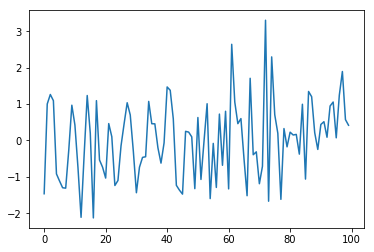

In [8]:

for i in range(1):
    pl.clf()
    pl.plot(pl.randn(100))
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(0.1)

In [9]:
p_txt = "123,34,34,35"

def escape_line(line):
    res = []
    i = 0
    while i < len(line):
        if line[i] != 'd':
            res.append(int(line[i]))
            i += 1
        else:
            j = 1
            while line[i+j] != 'd':
                j += 1              
            res.append(int(line[i+1:i+j]))
            i = i + j + 1
    return res

def pi_txt_to_array(p_txt):
    temp = p_txt.replace(" ","").split(",")             
    return [escape_line(t) for t in temp]

pi_txt_to_array("251,d10d")
#escape_line("24d31d45")

[[2, 5, 1], [10]]

In [10]:
problem = []
problem.append(pi_txt_to_array("2121,334,1251,1311,233, 4211,223,211,33,242, 231,212,15,1322,241, 12,24,231,321,62"))
problem.append(pi_txt_to_array("4,225,3133,2122,1212,231,21112,221111,421211,1141121,113321,2131312,11111111,13111111,4332"))

In [11]:
problem = []
problem.append(pi_txt_to_array("251,d11d1,731,3521,41231, 4321,5322,5322,37,24, 38,287,1832,4332,531, 651,351,381,d10d1,41"))
problem.append(pi_txt_to_array("44,d11d5,d11d7,358,32322, 41423,4513,753,2554,3334, 5125,517,46,33,11, 11,11,11,33,99" ))

In [12]:
problem = []
problem.append(pi_txt_to_array("12,221,22,121,11211,3211,411,22,221,12"))
problem.append(pi_txt_to_array("4,13,d10d,1111,121,121,111,121,11,8" ))

In [ ]:
#problem = [[[1,1],[8],[3,1],[4,2,1],[7,2,1],[1,4,2,1],[4,1],[1,2,4],[2,1,4],[3,2,1],[4,1,2,1],[1,1,2,2,1],[1,1,1,1],[8],[1,1,1]],
 #          [[1],[2],[1],[2,2],[1,2],[9],[5,1,1,1],[7,1,1,1],[15],[1,1],[1,3,2,1],[1,3,2,2,1],[1,2,1],[1,2,1],[15]]]  
col_len = len(problem[0])
row_len = len(problem[1])
solution = np.array([[No_clue] * col_len] * row_len)
#print(solution.shape)
#print(np.array(solution))
#print(np.array(solution).T)
#loop on columns
np.count_nonzero(solution == No_clue)

j = 0
progress = []
while No_clue in solution:
    for i,p in enumerate(problem[0]):
        solution.T[i] = all_update(solution.T[i],p, row_len )
    #pl.clf()
    #pl.imshow(solution)
    #display.display(pl.gcf())
    #display.clear_output(wait=True)
    #time.sleep(1)
    #input()
    for i,p in enumerate(problem[1]):
        solution[i] = all_update(solution[i], p, col_len )
    #print("Loop " + str(j) + ": " + "{0:.1f}".format(np.count_nonzero(solution == 2)/col_len/row_len * 100) + " %")
    #print(solution)
    progress.append("{0:.1f}".format(np.count_nonzero(solution == No_clue)/col_len/row_len * 100))
    j += 1dd
    pl.clf()
    pl.imshow(solution)
    display.display(pl.gcf())
    display.clear_output(wait=True)
    time.sleep(1)

#plt.imshow(solution)    
print(j, progress)

In [13]:
info = [3,5]


res_len = 12
ones_len= info[0]
base = [1] * ones_len
print(base)
res_space = min_space(info[1:])
n_spaces = res_len - res_space - ones_len - 1
print(n_spaces)
i = 3
[base + [0] + res for res in list_rc(info[1:], res_space + n_spaces)]
[[0]*i + base + [0]*(n_spaces-i) + res for res in list_rc(info[1:], res_space + n_spaces-i)]
res = [[]]
for i in range(n_spaces):
    first = list_rc([info[0]], i + info[0])
    second =  list_rc(info[1:], res_space + n_spaces - i)
    res += [f + [0] + s for f in first for s in second]
return res[1:]

[1, 1, 1]
3


[[1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0],
 [1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0],
 [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0],
 [0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1],
 [0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
 [0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1],
 [1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0]]

In [317]:
l = [[1,2], [2,3]]
ll =[ [2,3]]
l + ll

[[1, 2], [2, 3], [2, 3]]